In [31]:
import tensorflow
from tensorflow import keras
from keras.applications.vgg16 import VGG16,preprocess_input

# Loading Model

In [2]:
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 241s 0us/step


In [3]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# Visualizing filters

In [8]:
for i in range(len(model.layers)):
    if 'conv' not in model.layers[i].name:
        continue
    filters,biases = model.layers[i].get_weights()
    print("layer number",i,model.layers[i].name,filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


###### Convolutional filters = ek 4D tensor hota hai → (filter_height, filter_width, input_channels, number_of_filters)

###### Biases = ek 1D vector hota hai → (number_of_filters,)

# Normalizing Filter Values

In [9]:
f_max , f_min = filters.max() , filters.min()
filters = (filters - f_min)/ (f_max - f_min)

# Plot the Filters

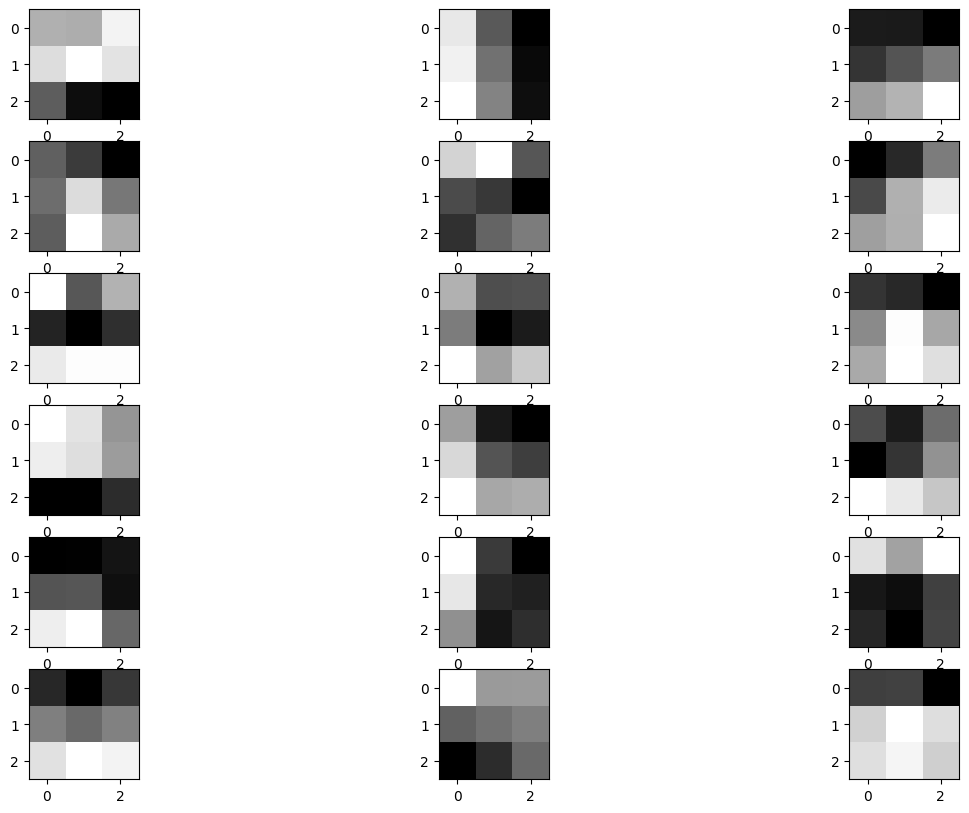

In [18]:
import matplotlib.pyplot as plt
n_filters = 6
ix =1
fig = plt.figure(figsize = (15,10))
for i in range (n_filters):
    f = filters[:,:,:,i]
    for j in range (3):
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j],cmap = 'gray')
        ix += 1
plt.show()

In [25]:
from keras.models import Model
model = Model(inputs = model.inputs , outputs = model.layers[1].output) 
#Ye line basically tumhare original CNN model ka ek naya version banati hai jiska output kisi intermediate layer se liya jata hai 
#(final output layer se nahi). 
# yahan second layer se output le rha hai

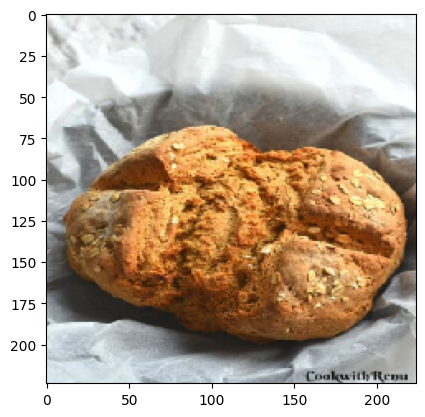

In [28]:
from tensorflow.keras.preprocessing import image

image_path = 'images/bread.jpg'
img = image.load_img(image_path,target_size = (224,224))
import matplotlib.pyplot as plt
plt.imshow(img)

In [32]:
import numpy as np
x = image.img_to_array(img)
x= np.expand_dims(x,axis= 0) # ye reshape kre ga aur 1 add kre ga as a batch size
x = preprocess_input(x)

# Feature Map

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


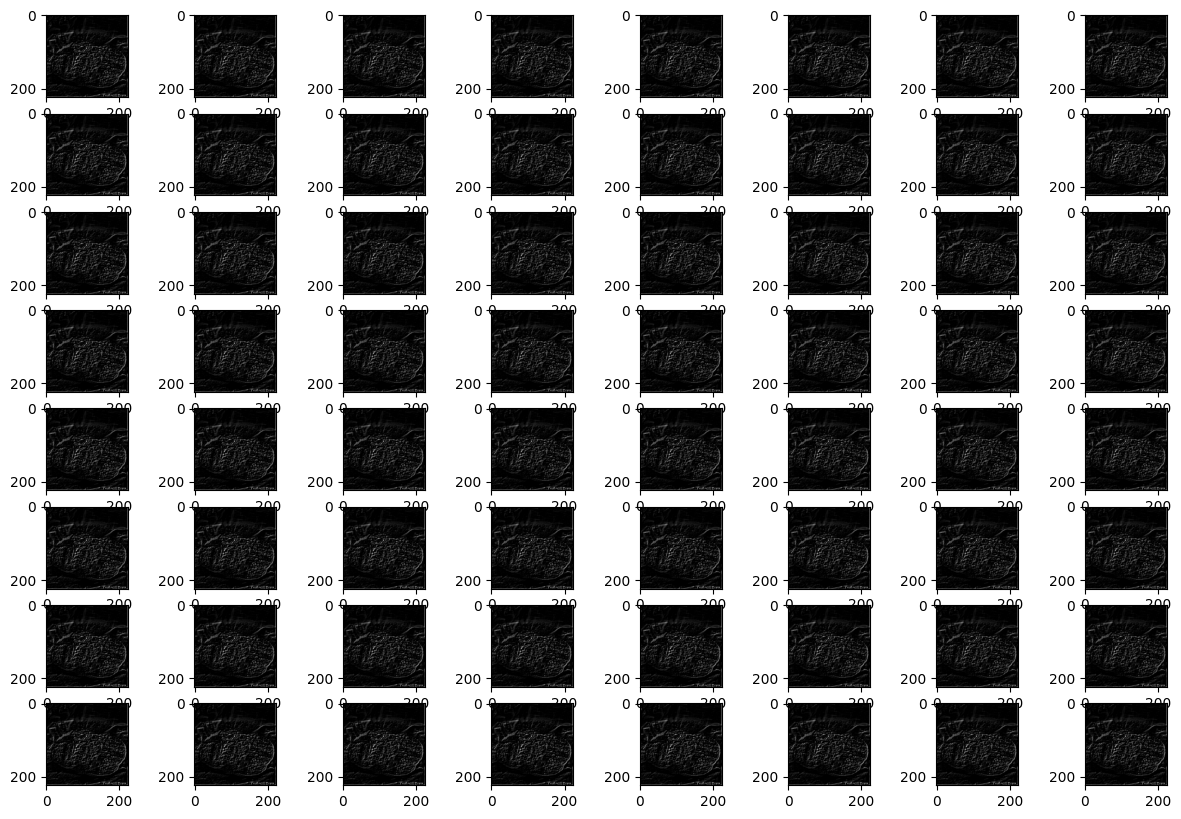

In [34]:
features = model.predict(x)
fig = plt.figure(figsize = (15,10))
for i in range (1,features.shape[3]+1):
   
        plt.subplot(8,8,i)
        plt.imshow(features[0,:,:,1-1],cmap = 'gray')
        ix += 1
plt.show()